#Energy Demand

In [ ]:
from datetime import datetime
import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline

In [ ]:
User_Start_date = datetime.datetime(2023, 7, 15, 0)
User_End_date = datetime.datetime(2023, 7, 21, 23)
Pload = [90, 80, 84,	75, 110, 97, 115]

# Solar Energy Forecast

# Specification Section

In [ ]:
#Specifications
'''
Kurnool Solar Park - Azure Power
Area of single panel = 1.91 m2
Power rating of each 315 W
Efficiency of panel = 15 %
Number of panels = 190,000
Total capacity of the plant = 50 MW
'''

'\nKurnool Solar Park - Azure Power\nArea of single panel = 1.91 m2\nPower rating of each 315 W\nEfficiency of panel = 15 %\nNumber of panels = 190,000\nTotal capacity of the plant = 50 MW\n'

In [ ]:
# Convert the date and time columns to a pandas datetime object
solarlink = "https://github.com/ksuryachandra/Wind-Power-Forecast/blob/main/SolarDataProcessed.xlsx?raw=true"
data = pd.read_excel(solarlink)
data1 = data
nums = [str(s)[:2] for s in data.Time.dt.time]
data.insert(7,"Hour", nums)
months = [str(s)[5:7] for s in data.Time.dt.date]
days = [str(s)[8:10] for s in data.Time.dt.date]
originalyear = [str(st)[:4] for st in data.Time.dt.date]
data.insert(8,"Day", days)
data.insert(9,"Month", months)

In [ ]:
data

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
0,2022-01-01 00:00:00,0.0,0.64,0.32,0.64,17.7,17.8,00,01,01
1,2022-01-01 01:00:00,0.0,0.64,0.32,0.64,17.4,17.6,01,01,01
2,2022-01-01 02:00:00,0.0,0.64,0.32,0.64,17.1,17.5,02,01,01
3,2022-01-01 03:00:00,0.0,0.64,0.32,0.64,16.7,16.5,03,01,01
4,2022-01-01 04:00:00,0.0,0.64,0.32,0.64,16.4,16.3,04,01,01
...,...,...,...,...,...,...,...,...,...,...
9057,2023-01-31 19:00:00,0.0,0.48,0.32,0.48,22.8,23.8,19,31,01
9058,2023-01-31 20:00:00,0.0,0.48,0.32,0.48,20.1,21.5,20,31,01
9059,2023-01-31 21:00:00,0.0,0.48,0.32,0.48,19.3,20.5,21,31,01
9060,2023-01-31 22:00:00,0.0,0.48,0.32,0.48,19.0,19.7,22,31,01


In [ ]:
test_df = data.iloc[:,[0,1]]
test_df = test_df.sort_values(by = "Time")
test_df

,Time,Virtual MFM AC Power (kW)
0,2022-01-01 00:00:00,0.0
1,2022-01-01 01:00:00,0.0
2,2022-01-01 02:00:00,0.0
3,2022-01-01 03:00:00,0.0
4,2022-01-01 04:00:00,0.0
...,...,...
9057,2023-01-31 19:00:00,0.0
9058,2023-01-31 20:00:00,0.0
9059,2023-01-31 21:00:00,0.0
9060,2023-01-31 22:00:00,0.0


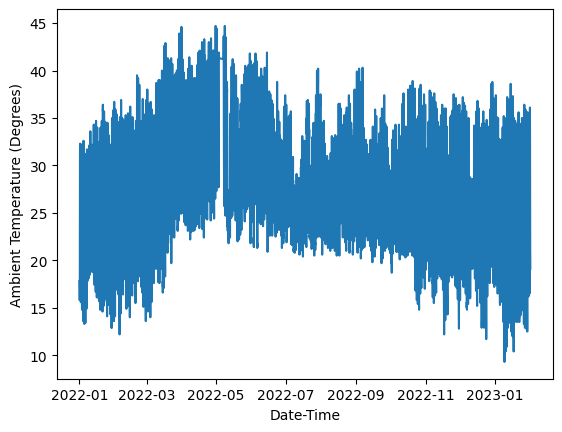

In [ ]:
fig = plt.figure()
plt.plot(data.iloc[:,0], data.iloc[:,6])
plt.xlabel("Date-Time")
plt.ylabel("Ambient Temperature (Degrees)")
fig.savefig("Ambient Temperature in 2022.svg")
plt.show()

In [ ]:
data.iloc[30*24*4:30*24*5,[0,-4]]

,Time,Amb Temp (°C)
2880,2022-05-13 07:00:00,27.5
2881,2022-05-13 08:00:00,29.2
2882,2022-05-13 09:00:00,33.3
2883,2022-05-13 10:00:00,34.0
2884,2022-05-13 11:00:00,33.4
...,...,...
3595,2022-06-13 08:00:00,27.8
3596,2022-06-13 09:00:00,29.0
3597,2022-06-13 10:00:00,30.8
3598,2022-06-13 12:00:00,35.4


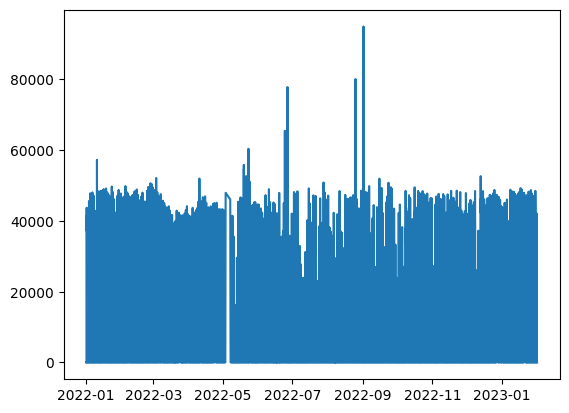

In [ ]:
fig = plt.figure()
plt.plot(test_df.iloc[:,0], test_df.iloc[:,1])
fig.savefig("Solar Power in 1 year.svg")
plt.show()

In [ ]:
data

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
0,2022-01-01 00:00:00,0.0,0.64,0.32,0.64,17.7,17.8,00,01,01
1,2022-01-01 01:00:00,0.0,0.64,0.32,0.64,17.4,17.6,01,01,01
2,2022-01-01 02:00:00,0.0,0.64,0.32,0.64,17.1,17.5,02,01,01
3,2022-01-01 03:00:00,0.0,0.64,0.32,0.64,16.7,16.5,03,01,01
4,2022-01-01 04:00:00,0.0,0.64,0.32,0.64,16.4,16.3,04,01,01
...,...,...,...,...,...,...,...,...,...,...
9057,2023-01-31 19:00:00,0.0,0.48,0.32,0.48,22.8,23.8,19,31,01
9058,2023-01-31 20:00:00,0.0,0.48,0.32,0.48,20.1,21.5,20,31,01
9059,2023-01-31 21:00:00,0.0,0.48,0.32,0.48,19.3,20.5,21,31,01
9060,2023-01-31 22:00:00,0.0,0.48,0.32,0.48,19.0,19.7,22,31,01


# Data Visualization

In [ ]:
data.loc[6:24]

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
6,2022-01-01 06:00:00,0.0,0.64,0.32,0.64,15.9,16.0,06,01,01
7,2022-01-01 07:00:00,0.0,34.88,31.84,34.88,16.8,16.7,07,01,01
8,2022-01-01 08:00:00,6014.5,289.60,260.64,289.60,24.9,24.5,08,01,01
9,2022-01-01 09:00:00,28911.2,567.52,500.32,567.52,36.4,28.3,09,01,01
10,2022-01-01 10:00:00,39795.8,794.08,692.00,794.08,43.2,29.2,10,01,01
11,2022-01-01 11:00:00,43748.6,909.76,764.96,909.76,46.8,31.1,11,01,01
12,2022-01-01 12:00:00,38502.2,1024.32,846.72,1024.32,50.9,31.7,12,01,01
13,2022-01-01 13:00:00,37154.1,1080.32,860.48,1080.32,45.8,31.1,13,01,01
14,2022-01-01 14:00:00,41572.4,876.00,640.32,876.00,42.6,29.4,14,01,01
15,2022-01-01 15:00:00,35586.7,760.00,501.28,760.00,47.9,32.3,15,01,01


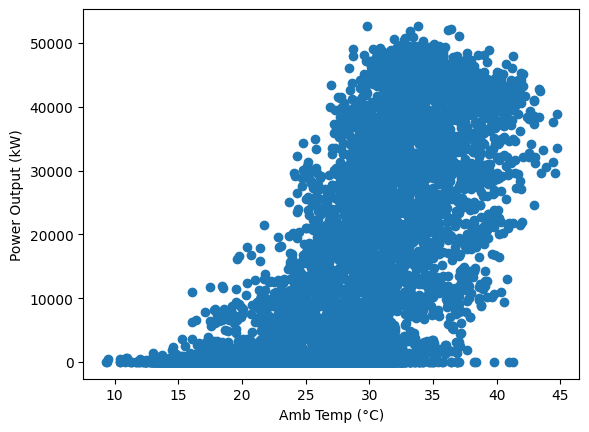

In [ ]:
cols = ['Amb Temp (°C)', 'Virtual MFM AC Power (kW)'] # one or more
temp_df1 = data.copy(deep=True)
Q1 = temp_df1[cols].quantile(0.25)
Q3 = temp_df1[cols].quantile(0.75)
IQR = Q3 - Q1
df = temp_df1[~((temp_df1[cols] < (Q1 - 1.5 * IQR)) |(temp_df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
fig = plt.figure()
plt.scatter( df["Amb Temp (°C)"],df["Virtual MFM AC Power (kW)"])
plt.xlabel('Amb Temp (°C)')
plt.ylabel("Power Output (kW)")
fig.savefig("Temperature vs Power.svg")
plt.show()

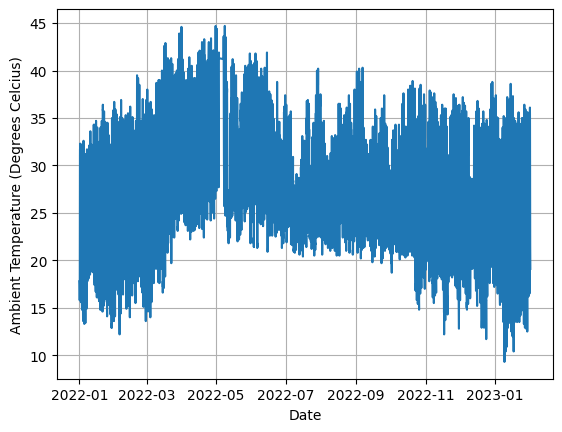

In [ ]:
fig = plt.figure()
plt.plot(df["Time"], df["Amb Temp (°C)"])
plt.ylabel('Ambient Temperature (Degrees Celcius)')
plt.xlabel("Date")
plt.grid()
fig.savefig("Yearly Temperature.svg")
plt.show()

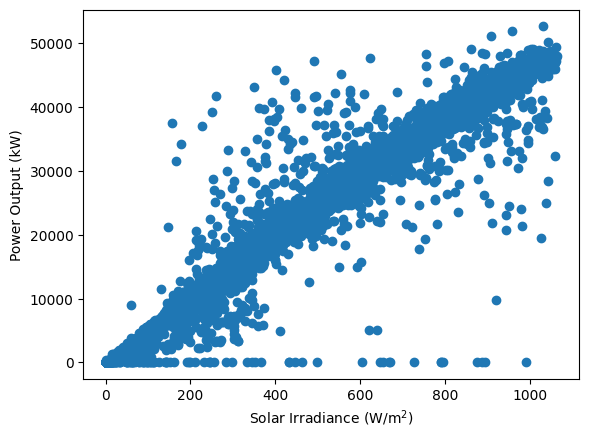

In [ ]:
cols = ['Irradiance ( W/m²)', 'Virtual MFM AC Power (kW)'] # one or more
temp_df1 = data.copy(deep=True)
Q1 = temp_df1[cols].quantile(0.25)
Q3 = temp_df1[cols].quantile(0.75)
IQR = Q3 - Q1
df = temp_df1[~((temp_df1[cols] < (Q1 - 1.5 * IQR)) |(temp_df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
fig = plt.figure()
plt.scatter( df["Irradiance ( W/m²)"],df["Virtual MFM AC Power (kW)"])
plt.xlabel(r'Solar Irradiance (W/m$^2$)')
plt.ylabel("Power Output (kW)")
fig.savefig("Solar Irradiance vs Power.svg")
plt.show()

In [ ]:
fig.savefig("Irrad vs Power.svg")

# Machine learning model to predict Temperature

In [ ]:
# Train the model with historical temperature

df = data
df = df.fillna(method='ffill')
X = df.iloc[:,[-1,-2,-3]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-4].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf0 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf0.fit(X_train, y_train);

predictions = srf0.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')

Accuracy: 95.02 %.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
temp_df1 = data.copy(deep=True)
boston = temp_df1
boston["Irradiance_Square"] = boston["Irradiance ( W/m²)"].values**2
X = boston[["Irradiance ( W/m²)", "Irradiance_Square"]].values
y = boston["Virtual MFM AC Power (kW)"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
coeff = reg.coef_
# disc = data.copy(deep = True)
# for i in range(len(data)):
#   if data.iloc[i,1] != 0:
#     disc.iloc[i,1] = coeff[0]*data.iloc[i,1] + coeff[1]*data.iloc[i,1]*data.iloc[i,1]
# disc
print('Coefficients: ', reg.coef_)

# data["Virtual MFM AC Power (kW)"] = coeff[0]*data["Irradiance ( W/m²)"] + coeff[1]*data["Irradiance ( W/m²)"]*data["Irradiance ( W/m²)"]
#data["Formula_Power"] = data["Irradiance ( W/m²)"]*(1+(0.33*data["Amb Temp (°C)"]/273))*0.15*361


Coefficients:  [ 5.53696224e+01 -1.02845111e-02]


# ML model Development for solar power

In [ ]:
df = data
df = df.fillna(method='ffill')
X = df.iloc[:,[-1,-2,-3,-4]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-5].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf1.fit(X_train, y_train);

predictions = srf1.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
predictions = srf1.predict(data.iloc[:,[-1,-2,-3,-4]].values)
predictions

Accuracy: 96.66 %.


array([17.5504, 17.3025, 17.073 , ..., 19.4724, 18.8374, 18.0747])

In [ ]:
mod_df = df.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
mod_df.insert(4,"Pred Mod Temp", predictions)

In [ ]:
mod_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp
0,01,01,00,17.8,17.5504
1,01,01,01,17.6,17.3025
2,01,01,02,17.5,17.0730
3,01,01,03,16.5,15.7757
4,01,01,04,16.3,16.2557
...,...,...,...,...,...
9057,01,31,19,23.8,22.9045
9058,01,31,20,21.5,20.0007
9059,01,31,21,20.5,19.4724
9060,01,31,22,19.7,18.8374


In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5]].to_numpy()
y = df.iloc[:,-6].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf2.fit(X_train, y_train);

predictions = srf2.predict(X_test)
# errors = abs(predictions - y_test)
# mape = 100 * (errors / y_test)
# accuracyRandForest = 100 - np.mean(mape)
# print('Accuracy:', round(accuracyRandForest, 2), '%.')
predictions = srf2.predict(mod_df.values)
predictions

array([0.63296, 0.62992, 0.62736, ..., 0.48272, 0.48864, 0.59824])

In [ ]:
POA_df = data.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
POA_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
POA_df.insert(5,"Pred POA", predictions)
POA_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA
0,01,01,00,17.8,17.5504,0.63296
1,01,01,01,17.6,17.3025,0.62992
2,01,01,02,17.5,17.0730,0.62736
3,01,01,03,16.5,15.7757,0.62960
4,01,01,04,16.3,16.2557,0.63088
...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032
9058,01,31,20,21.5,20.0007,0.48032
9059,01,31,21,20.5,19.4724,0.48272
9060,01,31,22,19.7,18.8374,0.48864


In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6]].to_numpy()
y = df.iloc[:,-7].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf3.fit(X_train, y_train);

predictions = srf3.predict(POA_df.values)
predictions

array([0.3208 , 0.32592, 0.32512, ..., 0.32   , 0.32   , 0.33568])

In [ ]:
GHI_df = data.iloc[:,[-1,-2,-3,-4]].copy(deep=True)
GHI_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
GHI_df.insert(5,"Pred POA", POA_df.iloc[:,-1])
GHI_df.insert(6,"Pred GHI", predictions)
GHI_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI
0,01,01,00,17.8,17.5504,0.63296,0.32080
1,01,01,01,17.6,17.3025,0.62992,0.32592
2,01,01,02,17.5,17.0730,0.62736,0.32512
3,01,01,03,16.5,15.7757,0.62960,0.41456
4,01,01,04,16.3,16.2557,0.63088,0.37472
...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000
9058,01,31,20,21.5,20.0007,0.48032,0.31408
9059,01,31,21,20.5,19.4724,0.48272,0.32000
9060,01,31,22,19.7,18.8374,0.48864,0.32000


In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7]].to_numpy()
y = df.iloc[:,-8].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf4.fit(X_train, y_train);

predictions = srf4.predict(GHI_df.values)
predictions

array([0.64, 0.64, 0.64, ..., 0.48, 0.48, 0.64])

In [ ]:
Rad_df = GHI_df.copy(deep=True)
Rad_df.insert(7,"Pred Irradiance",predictions)
Rad_df

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance
0,01,01,00,17.8,17.5504,0.63296,0.32080,0.64
1,01,01,01,17.6,17.3025,0.62992,0.32592,0.64
2,01,01,02,17.5,17.0730,0.62736,0.32512,0.64
3,01,01,03,16.5,15.7757,0.62960,0.41456,0.64
4,01,01,04,16.3,16.2557,0.63088,0.37472,0.64
...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000,0.48
9058,01,31,20,21.5,20.0007,0.48032,0.31408,0.48
9059,01,31,21,20.5,19.4724,0.48272,0.32000,0.48
9060,01,31,22,19.7,18.8374,0.48864,0.32000,0.48


In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7,-8]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-9].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

srf5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
srf5.fit(X_train, y_train);

predictions = srf5.predict(Rad_df.values)
accuracyRandForest = 100 - np.mean(mape)

In [ ]:
finale = Rad_df.copy(deep = True)
finale.insert(8,"Pred Power",predictions)
finale

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance,Pred Power
0,01,01,00,17.8,17.5504,0.63296,0.32080,0.64,0.0000
1,01,01,01,17.6,17.3025,0.62992,0.32592,0.64,0.0000
2,01,01,02,17.5,17.0730,0.62736,0.32512,0.64,0.0000
3,01,01,03,16.5,15.7757,0.62960,0.41456,0.64,0.0000
4,01,01,04,16.3,16.2557,0.63088,0.37472,0.64,0.0000
...,...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9045,0.48032,0.34000,0.48,0.0546
9058,01,31,20,21.5,20.0007,0.48032,0.31408,0.48,0.0000
9059,01,31,21,20.5,19.4724,0.48272,0.32000,0.48,0.0000
9060,01,31,22,19.7,18.8374,0.48864,0.32000,0.48,0.0000


# Performance Evaluation of the ML model with Historical data

In [ ]:
import datetime

start_date = "2023-01-24"
end_date = "2023-01-31"

year1 = int(start_date[:4])
month1 = int(start_date[5:7])
date1 = int(start_date[-2:])
data[data.Time.dt.date >= datetime.date(year1,month1,date1)]

year2 = int(end_date[:4])
month2 = int(end_date[5:7])
date2 = int(end_date[-2:])

datag = data[data.Time.dt.date >= datetime.date(year1,month1,date1)]
dataf = datag[data.Time.dt.date <= datetime.date(year2,month2,date2)]
dataf = dataf.reset_index().drop(["index"], axis = 1)
dataf

<ipython-input-48-3d28d677b5a1>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataf = datag[data.Time.dt.date <= datetime.date(year2,month2,date2)]


,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
0,2023-01-24 00:00:00,0.0,0.48,0.32,0.48,18.4,18.7,00,24,01
1,2023-01-24 01:00:00,0.0,0.48,0.32,0.48,16.2,16.7,01,24,01
2,2023-01-24 02:00:00,0.0,0.48,0.32,0.48,15.4,15.8,02,24,01
3,2023-01-24 03:00:00,0.0,0.64,0.32,0.64,15.2,15.5,03,24,01
4,2023-01-24 04:00:00,0.0,0.48,0.32,0.48,15.1,15.0,04,24,01
...,...,...,...,...,...,...,...,...,...,...
187,2023-01-31 19:00:00,0.0,0.48,0.32,0.48,22.8,23.8,19,31,01
188,2023-01-31 20:00:00,0.0,0.48,0.32,0.48,20.1,21.5,20,31,01
189,2023-01-31 21:00:00,0.0,0.48,0.32,0.48,19.3,20.5,21,31,01
190,2023-01-31 22:00:00,0.0,0.48,0.32,0.48,19.0,19.7,22,31,01


In [ ]:
pred_df = dataf.iloc[:,[-1,-2,-3]]
#pred_df = data[data.Time.dt.date == datetime.date(2022,5,22)].iloc[:,[-1,-2,-3,-4]]
mod_temp = rf0.predict(pred_df.iloc[:,[0,1,2]].values)
pred_df.insert(3,"Ambient Temp",mod_temp)
mod_temp = rf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp)
POA = rf2.predict(pred_df.values).tolist()
pred_df.insert(5,"POA",POA)
GHI = rf3.predict(pred_df.values).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df.values).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df.values).tolist()
pred_df.insert(8,"Predicted_Power",Power)
pred_df.insert(0,"DateTime",dataf["Time"])
pred1_df = pred_df.iloc[:,[0,4,8,9]].copy(deep = True)
pred1_df

NameError: ignored

In [ ]:
illit = pred_df.iloc[124:143,:]

In [ ]:
compare_df = data.iloc[:,[0,6,2,1]].copy(deep=True)
compare_df

In [ ]:
new_df = pd.merge(compare_df, pred1_df, how='inner', left_on = 'Time', right_on = 'DateTime')
new_df

In [ ]:
new_df.loc[5:24]

In [ ]:
example1 = new_df.loc[:].copy(deep=True)
example1["Error"] = abs(new_df["Predicted_Power"]-new_df["Virtual MFM AC Power (kW)"])/new_df["Virtual MFM AC Power (kW)"]*100
#example1["Calculated_Error"] = abs(new_df["Predicted_Power"]-new_df["Formula_Original_Power"])/new_df["Formula_Original_Power"]*100
example1

disc1 = []
for i in range(len(new_df)):
  if new_df.iloc[i,3] != 0:
    disc1.append(abs(new_df.iloc[i,7]-new_df.iloc[i,3])/new_df.iloc[i,3]*100)
  else:
    disc1.append(0)
example1["Error"] = disc1
example1

In [ ]:
tempdates1 = [str(st)[:10] for st in example1["Time"]]
example1.insert(1,"Date",tempdates1)
example1["Accuracy"] = 100-example1["Error"]
example1

In [ ]:
example1[example1["Date"] == "2023-01-30"]

In [ ]:
Acc = example1.groupby(["Date"]).agg(Generated_Power_MW = ("Virtual MFM AC Power (kW)","mean"),Predicted_Power_MW = ("Predicted_Power","mean"), Accuracy = ("Accuracy", "mean"))
Acc

In [ ]:
print("Overall Accuracy of the model: "+ str(Acc["Accuracy"].mean()))

# Solar Energy Forecast - Next 7 days




In [ ]:
#Future prediction

start_date = User_Start_date  # start date and time
end_date = User_End_date  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(str(date))

year = [int(s[:4]) for s in future]
mnth = [int(s[5:7]) for s in future]
days = [int(s[8:10]) for s in future]
hour = [int(s[11:13]) for s in future]

future_df = pd.DataFrame({"Year":year, "Month":mnth, "Day" :days, "hour": hour})

predictions = rf0.predict(future_df.iloc[:,[1,2,3]].values)
pred_temp = future_df.iloc[:,:].copy(deep=True)
pred_temp.insert(0,"Date Time", future)
pred_temp.insert(1,"Predicted Temp", predictions)
temp_output = pd.DataFrame({"DataTime": pred_temp.iloc[:,0], "Temperature": pred_temp.iloc[:,1]})
temp_output

In [ ]:
pred_df = pred_temp.iloc[:,[-3,-2,-1,1]]
#pred_df = data[data.Time.dt.date == datetime.date(2022,5,22)].iloc[:,[-1,-2,-3,-4]]
mod_temp = rf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp)
POA = rf2.predict(pred_df.values).tolist()
pred_df.insert(5,"POA",POA)
GHI = rf3.predict(pred_df.values).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df.values).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df.values).tolist()
pred_df.insert(8,"Predicted_Power",Power)
pred_df.insert(0,"Date Time", future)

In [ ]:
final_df = pred_df.iloc[:,[0,4,8,9]].copy(deep=True)
final_df

In [ ]:
tempdates = [st[:10] for st in final_df["Date Time"]]
final_df.insert(1,"Date",tempdates)
final_df

In [ ]:
final_df.iloc[:24,:]

In [ ]:
final_df["Formula_Power"] = coeff[0]*final_df["Irradiance"] + coeff[1]*final_df["Irradiance"]*final_df["Irradiance"] # Analytical Formula

In [ ]:
example = final_df[final_df["Date"] == "2023-05-03"].copy(deep=True)
diffgens = example[0:0]
for i in range(int(len(final_df)/24 - 1)):
  tempo_df = final_df.loc[7 + i*24:16+i*24]
  if i == 0:
    diffgens = tempo_df
  else:
    df12 = [diffgens, tempo_df]
    diffgens = pd.concat(df12)
diffgens["Formula_Error"] = abs(diffgens["Predicted_Power"]-diffgens["Formula_Power"])/diffgens["Formula_Power"]*100
diffgens["Accuracy (%)"] = 100 - diffgens["Formula_Error"]
diffgens = diffgens.reset_index().drop(["index"], axis =1)
diffgens

In [ ]:
Acc_tbl = diffgens.groupby(["Date"]).agg(Error = ("Formula_Error", "mean"))
Acc_tbl["Accuracy"] = diffgens.groupby(["Date"]).agg(Error = ("Accuracy (%)", "mean"))
Acc_tbl

In [ ]:
print("Overall Accuracy: " + str(Acc_tbl.iloc[:,-1].mean())+ " %" + "\nError: " + str(Acc_tbl.iloc[:,0].mean())+ " %")

In [ ]:
SolarEnergy = diffgens.iloc[:,[0,4]].copy(deep=True)
SolarEnergy.insert(2,"Predicted_Energy", SolarEnergy.iloc[:,1]*3600)
SolarEnergy.iloc[:,2].sum()

In [ ]:
Solarfuture1 = final_df.groupby(["Date"]).agg(Total_Energy_KW = ("Predicted_Power", "sum"))
Solarfuture1

# Wind Energy Forecast

# Specifications of the Wind Farm


In [ ]:
#file:///C:/Users/sk565d/Downloads/MVTPL%20Kurnool%20Wind%20Farm.pdf
'''
Input Section
Turbine: Suzlon 2.1, MW-S-111, GE-1.7 MW-103, and GE-2.3MW-11
Type: DFIG Horizontal Axis Wind Turbine with variable Rotor Speed
Rated power: 1700 KW
Rotation speed: 10-17.14 rpm

No. of towers: 97
Air density - Average: 1.225 kg/m2
Annual average wind speed: 7.5 m/s
wind shear: 0.2
sut-in wind speed: 3 m/s
cut-out wind speed: 20 m/s
Rated wind speed: 9.4 m/s
survival wind speed: 52.5 m/s

Rotor:
Rotor diameter: 103 m
Rotor length: 50.2 m
No. of Blades: 3
Swept Area: 8332 m2
Orientation: Upwind
Direction of rotation: Clockwise

Generator:
Rated Power: 1745 KW
no. of poles: 4, 3-phase
Rated voltage: 690 V
Frequency: 50 Hz

Tower height:
Height: 79.7 m

30 x 1.7 MW (GE-1.7), 44 x 2.3 MW (GE-2.3), 23 x 2.1 MW (S-111 Salon) Wind Turbine Generators (WTG)
'''

In [ ]:
(30 * 1.7) + (44 * 2.3) + (23 * 2.1)

In [ ]:
AD = 1.225
WS = 7.5
Area = 3.14*50**2
0.5*AD*WS**3*Area*0.4

In [ ]:
(1700000/(0.5*AD*Area*0.4))**(1/3)

In [ ]:
3.14*50.2**2

In [ ]:
0.5*1.225*3.14*50**2*6.54**3*0.53

# Import plant historical data

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline


In [ ]:
windlink = "https://github.com/ksuryachandra/Wind-Power-Forecast/blob/main/WindDataProcessed.xlsx?raw=true"
wind_df = pd.read_excel(windlink)
future = wind_df.iloc[:,0]
mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [int(str(s)[11:13]) for s in future]
wind_df["Month"] = mnth
wind_df["Day"] = days
wind_df["Hour"] = hour
wind_df

In [ ]:
fig = plt.figure()
plt.plot(wind_df.iloc[:,0], wind_df.iloc[:,1])
fig.savefig("Wind Speed.svg")
plt.show()

# Wind Speed - ML model Development and Performance Evaluation

In [ ]:
# Predicts the Wind Speeds of next 7 days hourly rate
data1 = wind_df
X = data1.iloc[:,[-3, -2, -1]].to_numpy()
y = data1.iloc[:,1].to_numpy()
Y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
from sklearn.ensemble import RandomForestRegressor
rf0 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf0.fit(X_train, y_train);
predictions0 = rf0.predict(X_test)
errors = abs(predictions0 - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')

In [ ]:
import datetime
import numpy as np

start_date = datetime.datetime(2022, 12, 1, 0)  # start date and time
end_date = datetime.datetime(2022, 12, 31, 23)  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(date)

mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [str(s)[11:13] for s in future]

future_df = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour})
predictions1 = rf0.predict(future_df.iloc[:,[0,1,2]].values)
future_df["Predicted Wind Speed (kmph)"] = predictions1
future_df.insert(0, "Date-Time", future)
future_df = future_df.drop(["Month", "Day", "hour"], axis = 1)
temp_output = future_df
temp_output

In [ ]:
compare_df = wind_df.iloc[-len(temp_output):,[0,1]].reset_index().drop(["index"], axis=1)
new_df = pd.merge(compare_df, temp_output, how= "inner", left_on = "Date-Time", right_on = "Date-Time")
new_df

In [ ]:
new_df["Error"] = abs(new_df["Wind Speed (kmph)"] - new_df["Predicted Wind Speed (kmph)"])/new_df["Wind Speed (kmph)"] * 100
new_df["Accuracy"] = 100 - new_df["Error"]
new_df

In [ ]:
print("Overall Accuracy of Wind Speed: " +str(round(new_df.iloc[:,-1].mean(),2))+ " %")

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(new_df.iloc[:,0], new_df.iloc[:,1], color = "red")
plt.plot(temp_output.iloc[:,0], temp_output.iloc[:,1], color = "green")

# Wind Energy - ML Development and Performance Evaluation

In [ ]:
# Predicts the Wind Speeds of next 7 days hourly rate
data1 = wind_df
X = data1.iloc[:,[-3, -2, -1, 1]].to_numpy()
y = data1.iloc[:,2:8].to_numpy()
Y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf1.fit(X_train, y_train);
predictions2 = rf1.predict(X_test)
errors = abs(predictions2 - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')

In [ ]:
import datetime
import numpy as np

start_date = datetime.datetime(2022, 12, 1, 0)  # start date and time
end_date = datetime.datetime(2022, 12, 31, 23)  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(date)

year = [int(str(s)[:4]) for s in future]
mnth = [int(str(s)[5:7]) for s in future]
days = [int(str(s)[8:10]) for s in future]
hour = [int(str(s)[11:13]) for s in future]

future_df1 = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour, "Predictd Wind Speed": predictions1})

predictions3 = rf1.predict(future_df1.iloc[:,[0,1,2,3]].values)

In [ ]:
output_df = pd.DataFrame(predictions3, columns = data1.columns[2:8])
output_df.insert(0, "Date_Time", future)
output_df.insert(1, "Predicted Windspeed", predictions1)
output_df

In [ ]:
diff_df = wind_df.iloc[-len(output_df):,:].reset_index().drop(["index"], axis=1)
diff_df

In [ ]:
output_df

In [ ]:
windcomp_df = pd.merge(output_df,diff_df, how = "inner",left_on="Date_Time", right_on = "Date-Time")
windcomp_df = windcomp_df.iloc[:,[0,2,3,4,5,6,8,17]]
windcomp_df["Accuracy"] = 100 - (abs(windcomp_df['Turbine Energy (MWh)_x']-windcomp_df['Turbine Energy (MWh)_y'])/windcomp_df['Turbine Energy (MWh)_y'])*100
windcomp_df[24*7:24*8]

In [ ]:
windcomp_df.iloc[24*7:24*8,-1].mean()

In [ ]:
errors = []
overall = []
for i in range(1,8):
  errors.append(100 - ((abs(output_df.iloc[:,i] - diff_df.iloc[:,i]) / diff_df.iloc[:,i])* 100).mean())
errors

In [ ]:
sum(errors)/len(errors)

In [ ]:
tempdates = [str(st)[:10] for st in diff_df["Date-Time"]]
diff_df.insert(1,"Date",tempdates)
current = diff_df.groupby(["Date"]).agg(Energy_per_Day_MJ = ("Turbine Energy (MWh)", "sum"))

In [ ]:
tempdates = [str(st)[:10] for st in output_df["Date_Time"]]
output_df.insert(1,"Date",tempdates)
out = output_df.groupby(["Date"]).agg(Energy_per_Day_MJ = ("Turbine Energy (MWh)", "sum"))

In [ ]:
out.insert(1,"Generated Energy", current)


In [ ]:
out["Accuracy (%)"] = 100 - (abs(out.iloc[:,0] - out.iloc[:,1])/out.iloc[:,1])*100
out.head()

In [ ]:
out

In [ ]:
print("Overall accuracy: " + str(round(out.iloc[:,2].mean(),2)) + " %")

# Wind Energy Forecast - Next 7 days

In [ ]:
import datetime
import numpy as np

start_date = User_Start_date  # start date and time
end_date = User_End_date  # end date and time
delta = datetime.timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future1 = []
for date in dates:
    future1.append(date)

year = [int(str(s)[:4]) for s in future1]
mnth = [int(str(s)[5:7]) for s in future1]
days = [int(str(s)[8:10]) for s in future1]
hour = [int(str(s)[11:13]) for s in future1]

future_df2 = pd.DataFrame({"Month":mnth, "Day" :days, "hour": hour})

predictions3 = rf0.predict(future_df2.iloc[:,[0,1,2]].values)
predictions3
future_df2["Predicted Wind Speed (kmph)"] = predictions3
predictions4 = rf1.predict(future_df2.iloc[:,[0,1,2,3]].values)

In [ ]:
future_output = pd.DataFrame(predictions4, columns = wind_df.columns[2:8])
future_output.insert(0,"Date-Time", future1)
future_output.insert(1, "Predicted Wind Speed", predictions3)
future_output

In [ ]:
test_df1 = future_output.copy(deep = True)
test_df1["Formula_Energy"] = 0.5*future_output["Air Density (Kg/m3)"]*3.14*50**2* (future_output["Predicted Wind Speed"]/3.6)**3 *0.28
test_df1["accuracy"] = 100 - (abs(test_df1.iloc[:,-1] - test_df1.iloc[:,-3])/test_df1.iloc[:,-3])*100
test_df1.iloc[:,-1].mean()

In [ ]:
test_df1.iloc[:24,:]

In [ ]:
future_output.iloc[:24,:]

In [ ]:
Solarfutureacc = test_df1.groupby(["Date"]).agg(Predicted_Energy_per_Day_MJ = ("Energy (MJ)", "sum"), Formula_Energy_per_Day_MJ = ("Formula_Energy", "sum"), Accuracy = ("accuracy", "mean"))
Solarfutureacc

In [ ]:
Solarfutureacc.iloc[:,-1].mean()

In [ ]:
tempdates = [str(st)[:10] for st in future_output["Date-Time"]]
future_output.insert(1,"Date",tempdates)
future2 = future_output.groupby(["Date"]).agg(Energy_per_Day_MJ = ("Turbine Energy (MWh)", "sum"))
future2

#Output Section

In [ ]:
User_Start_date = datetime.datetime(2023, 7, 15, 0)
User_End_date = datetime.datetime(2023, 7, 21, 23)
Pload = [90, 80, 84,	75, 110, 97, 115]

In [ ]:
from datetime import datetime, timedelta
User_Start_date = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0)
User_End_date = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0) + timedelta(days = 7, hours = 23)

In [ ]:
#Future prediction
start_date = User_Start_date  # start date and time
end_date = User_End_date  # end date and time
delta = timedelta(hours=1)  # hourly interval

dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += delta
future = []
for date in dates:
    future.append(str(date))

year = [int(s[:4]) for s in future]
mnth = [int(s[5:7]) for s in future]
days = [int(s[8:10]) for s in future]
hour = [int(s[11:13]) for s in future]

future_df = pd.DataFrame({"Year":year, "Month":mnth, "Day" :days, "hour": hour})

predictions = rf0.predict(future_df.iloc[:,[1,2,3]].values)
pred_temp = future_df.iloc[:,:].copy(deep=True)
pred_temp.insert(0,"Date Time", future)
pred_temp.insert(1,"Predicted Temp", predictions)
temp_output = pd.DataFrame({"DataTime": pred_temp.iloc[:,0], "Temperature": pred_temp.iloc[:,1]})
temp_output

In [ ]:
pred_df = pred_temp.iloc[:,[-3,-2,-1,1]]
#pred_df = data[data.Time.dt.date == datetime.date(2022,5,22)].iloc[:,[-1,-2,-3,-4]]
mod_temp = rf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp)
POA = rf2.predict(pred_df.values).tolist()
pred_df.insert(5,"POA",POA)
GHI = rf3.predict(pred_df.values).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df.values).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df.values).tolist()
pred_df.insert(8,"Predicted_Power",Power)
pred_df.insert(0,"Date Time", future)

In [ ]:
final_df = pred_df.iloc[:,[0,4,8,9]].copy(deep=True)
final_df

In [ ]:
tempdates = [st[:10] for st in final_df["Date Time"]]
final_df.insert(1,"Date",tempdates)
final_df

In [ ]:
final_df["Formula_Power"] = coeff[0]*final_df["Irradiance"] + coeff[1]*final_df["Irradiance"]*final_df["Irradiance"] # Analytical Formula

In [ ]:
example = final_df[final_df["Date"] == "2023-05-03"].copy(deep=True)
diffgens = example[0:0]
for i in range(int(len(final_df)/24 - 1)):
  tempo_df = final_df.loc[7 + i*24:16+i*24]
  if i == 0:
    diffgens = tempo_df
  else:
    df12 = [diffgens, tempo_df]
    diffgens = pd.concat(df12)
diffgens["Formula_Error"] = abs(diffgens["Predicted_Power"]-diffgens["Formula_Power"])/diffgens["Formula_Power"]*100
diffgens["Accuracy (%)"] = 100 - diffgens["Formula_Error"]
diffgens = diffgens.reset_index().drop(["index"], axis =1)
diffgens

In [ ]:
Acc_tbl = diffgens.groupby(["Date"]).agg(Error = ("Formula_Error", "mean"))
Acc_tbl["Accuracy"] = diffgens.groupby(["Date"]).agg(Error = ("Accuracy (%)", "mean"))
Acc_tbl

In [ ]:
print("Overall Accuracy: " + str(Acc_tbl.iloc[:,-1].mean())+ " %" + "\nError: " + str(Acc_tbl.iloc[:,0].mean())+ " %")

In [ ]:
SolarEnergy = diffgens.iloc[:,[0,4]].copy(deep=True)
SolarEnergy.insert(2,"Predicted_Energy", SolarEnergy.iloc[:,1]*3600)
SolarEnergy.iloc[:,2].sum()

In [ ]:
Solarfuture1 = final_df.groupby(["Date"]).agg(Total_Energy_KW = ("Predicted_Power", "sum"))
Solarfuture1

In [ ]:
future2["Avg_Power_per_day [MW]"] = future2/(3600*24)
future2

In [ ]:
Solarfuture1["Energy per day (MWh)"] = Solarfuture1["Total_Energy_KW"]*24
Solarfuture1 = Solarfuture1.iloc[:,[1,0]]
Solarfuture1

In [ ]:
EnergyForecast = pd.DataFrame()
EnergyForecast["Hybrid_System_Energy [MWh]"] = future2['Energy_per_Day_MJ'] + Solarfuture1["Energy per day (MWh)"]
EnergyForecast["Hybrid_System_Average_Power [MW]"] = EnergyForecast["Hybrid_System_Energy [MWh]"] / (3600*24)
EnergyForecast

In [ ]:
LoadBalance = pd.DataFrame()
LoadBalance["Power Supply [MW]"] = EnergyForecast.iloc[:,1]
LoadBalance["Demand [MW]"] = Pload
LoadBalance

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(LoadBalance.index,LoadBalance.iloc[:,0],c= "magenta", label='Load demanded')
#plt.scatter(LoadBalance.index, LoadBalance.iloc[:,0], s=100, edgecolor="r", facecolor="gold",  label='Total Power Generated')
plt.bar(LoadBalance.index,LoadBalance.iloc[:,1], c = 'r')
plt.grid()
plt.show()

#Output

In [10]:
n = 5
k = 9
arr = [5,10,1,9,3]
x = 36
flag = 0
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        temparr = arr.copy()
        temparr[i] = temparr[i]*k
        temparr[j] = temparr[j]*k
        tempmean = sum(temparr)/len(temparr)
        print(arr,temparr,tempmean)
        if tempmean == x:
          flag = 1

if flag == 0:
    print(False)
else:
    print(True)

[5, 10, 1, 9, 3] [45, 90, 1, 9, 3] 29.6
[5, 10, 1, 9, 3] [45, 10, 9, 9, 3] 15.2
[5, 10, 1, 9, 3] [45, 10, 1, 81, 3] 28.0
[5, 10, 1, 9, 3] [45, 10, 1, 9, 27] 18.4
[5, 10, 1, 9, 3] [5, 90, 9, 9, 3] 23.2
[5, 10, 1, 9, 3] [5, 90, 1, 81, 3] 36.0
[5, 10, 1, 9, 3] [5, 90, 1, 9, 27] 26.4
[5, 10, 1, 9, 3] [5, 10, 9, 81, 3] 21.6
[5, 10, 1, 9, 3] [5, 10, 9, 9, 27] 12.0
[5, 10, 1, 9, 3] [5, 10, 1, 81, 27] 24.8
True
